In [4]:
#Install Tensorflow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
#Predict whether the diagnosis of breast tissue is malignant or benign?
#Classic application of machine learning and deep learning 

In [5]:
#Load Data - From SciKit Learn
from sklearn.datasets import load_breast_cancer

In [6]:
#Call this function and load it into a variable called "data"
data = load_breast_cancer()

In [7]:
#Check the type of the variable called "data"
type(data)

sklearn.utils.Bunch

In [8]:
# Note that a type Bunch is like a dictionary
# You can treat the keys like attributes
data.keys()

#NOTE: Based on the output from keys() 
#data = input data x
#target = targe data y

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
#Check the shape of x by looking at the file data and the key data and its shape (should not have named the data set data with a key also named data - confusing)
data.data.shape

#569 samples or rows
#30 possilbe input features

(569, 30)

In [14]:
#Confirm that the lenght of y is equal to the lenght of x or 569
data.target.shape

(569,)

In [12]:
#print out the target
#note how many are are 0's and 1's
#normally, when you have K targets, they are labeled 0..K-1
#1-D Array of 0's and 1's
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
#Target names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
#Print out the feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
#Import Test, Train, Split
from sklearn.model_selection import train_test_split

In [19]:
#Split the data into training and testing sets (train and test sets)
#This lets us know how our model will perform in the future

#66% of data for training and 33% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

#Assign the shape of X_train to the variables N and D (for possible future use)
N, D = X_train.shape

In [21]:
#Scale the data
#Import StandardScaler 
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Tensorflow 

In [41]:
#Build the model
#List of inputs passed sequentially

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Instead of passing in a list of layers into the Sequential constructor
#We can pass in no arguments at all and later we can add layers
#Only need to add a Dense layer if we specify the input_shape "D"

#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation=='sigmoid'))

In [42]:
#Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/12 [=>............................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8438WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ffb6dd6e9d8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the

In [43]:
#Evaluate the model- evaluate() returns loss and accuracy 
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9869
Train score:  [0.07536261528730392, 0.9868766665458679]
6/6 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9787
Test score:  [0.09324401617050171, 0.978723406791687]


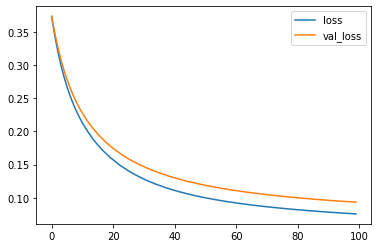

In [44]:
#Plot model.fit() output 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

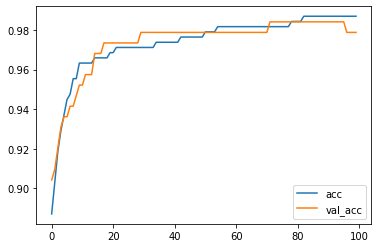

In [45]:
#Plot the model accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()